In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("../data/vehicle-type-detecion/pickup/PIC_0.jpg")

gray_im = im.convert("L")

Text(0.5, 1.0, 'Magnitude Specter')

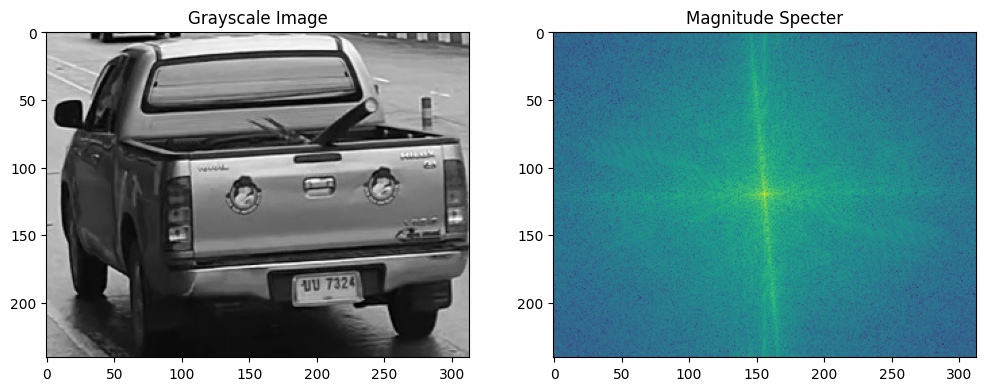

In [67]:
# 1) FOURIER TRANSFORM FREQUENCY SPECTRUM

im_np = np.array(gray_im)

F = np.fft.fft2(im_np)
F_shifted = np.fft.fftshift(F)

magn_spectr = np.log(1+np.abs(F_shifted))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(im_np, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(magn_spectr)
plt.title("Magnitude Specter")

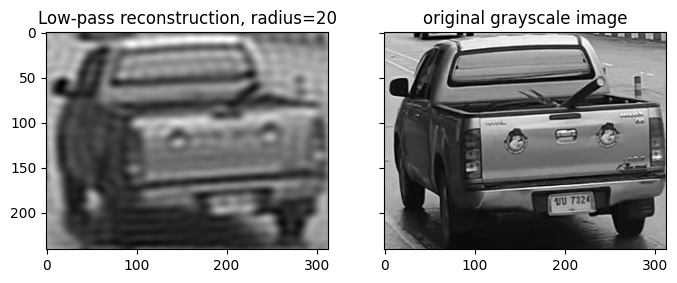

In [68]:
# 2) HIGH PASS FILTER

f_transform = np.fft.fft2(im_np)
f_shift = np.fft.fftshift(f_transform)

# create low-pass mask
rows, cols = im_np.shape
crow, ccol = rows // 2, cols // 2
low_pass_radius = 20
high_pass_radius = 15

y, x = np.ogrid[:rows, :cols]
mask = (x - ccol)**2 + (y - crow)**2 <= low_pass_radius**2
# mask = (x - ccol)**2 + (y - crow)**2 >= high_pass_radius**2


# apply mask
f_shift_filtered = f_shift * mask

# inverse shift and inverse FFT
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_reconstructed = (np.fft.ifft2(f_ishift).real)

# visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(img_reconstructed, cmap='gray')
ax1.set_title(f"Low-pass reconstruction, radius={low_pass_radius}")

ax2.imshow(gray_im, cmap='gray')
ax2.set_title("original grayscale image")
plt.show()






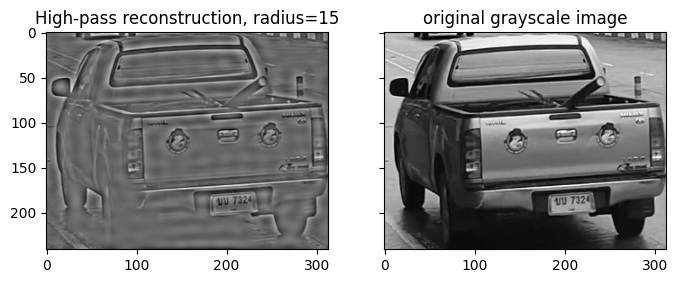

In [69]:
# 3) LOW PASS FILTER

f_transform = np.fft.fft2(im_np)
f_shift = np.fft.fftshift(f_transform)

# create low-pass mask
rows, cols = im_np.shape
crow, ccol = rows // 2, cols // 2
high_pass_radius = 15

y, x = np.ogrid[:rows, :cols]
mask = (x - ccol)**2 + (y - crow)**2 >= high_pass_radius**2

# apply mask
f_shift_filtered = f_shift * mask

# inverse shift and inverse FFT
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_reconstructed = (np.fft.ifft2(f_ishift).real)

# visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(img_reconstructed, cmap='gray')
ax1.set_title(f"High-pass reconstruction, radius={high_pass_radius}")

ax2.imshow(gray_im, cmap='gray')
ax2.set_title("original grayscale image")
plt.show()






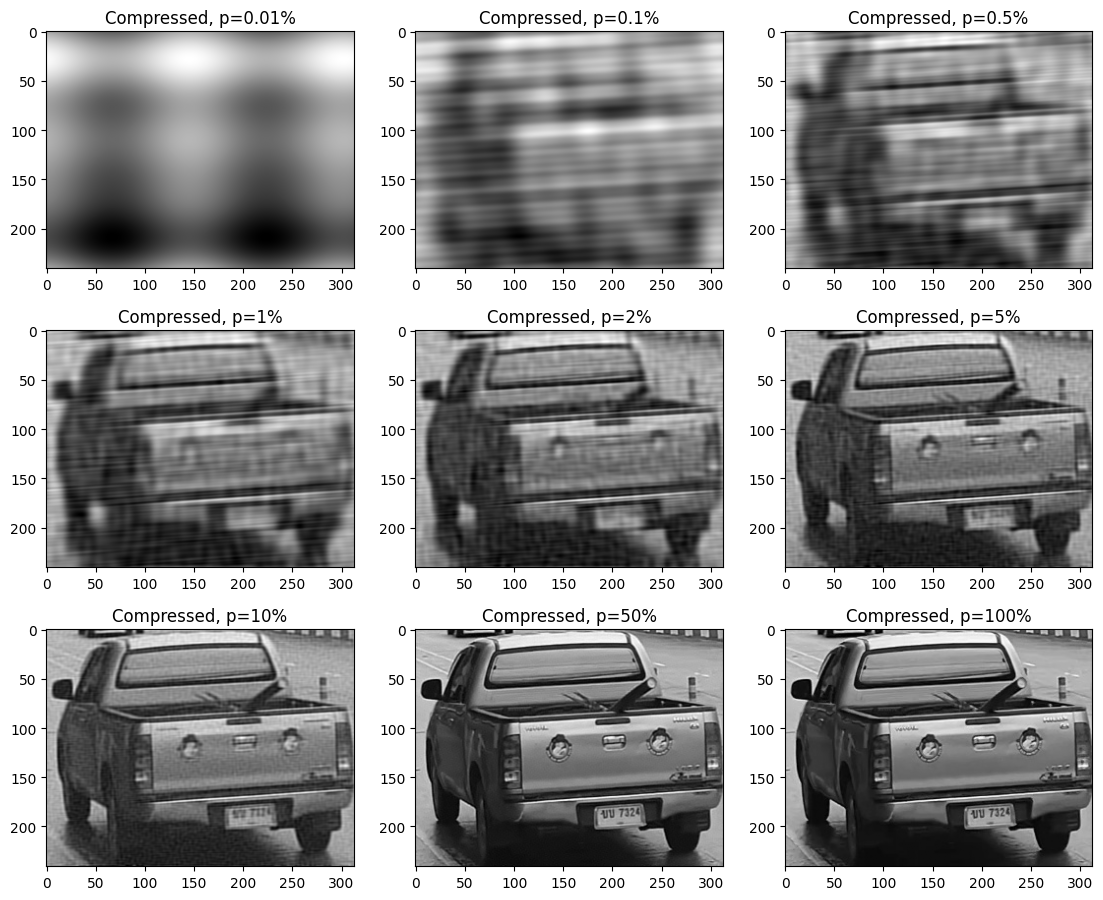

In [70]:
# 4) IMAGE COMPRESSION


# 2D Fourier transform and shift
np_im = np.array(gray_im)

f_transform = np.fft.fft2(np_im)
f_shift = np.fft.fftshift(f_transform)

ps = [0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]
fig, axes = plt.subplots(3, len(ps)//3, figsize=(1.5*len(ps), 11))
axes = axes.flatten()

magnitude = np.abs(f_shift)

flat = magnitude.flatten()

for i in range(len(ps)):
    p = ps[i]
    threshold = np.percentile(flat, 100 - p)  # top p%

    mask = magnitude >= threshold

    # apply mask
    f_shift_filtered = f_shift * mask

    # inverse shift and inverse FFT
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    img_reconstructed = (np.fft.ifft2(f_ishift).real)

    # visualization
    axes[i].imshow(img_reconstructed, cmap='gray')
    axes[i].set_title(f"Compressed, p={p}%")




